# Simple moving averages (SMA) and Exponentially-weighted Moving Averages (EWMA)

## Importing/exporting excel file

In [1]:
import pandas as pd

In [6]:
pd.read_excel('SP500.xls')

,Date,Open,High,Low,Close,Adj Close,Volume
0,1970-12-31,92.269997,92.790001,91.360001,92.150002,92.150002,13390000
1,1971-01-04,92.150002,92.190002,90.639999,91.150002,91.150002,10010000
2,1971-01-05,91.150002,92.279999,90.690002,91.800003,91.800003,12600000
3,1971-01-06,91.800003,93.000000,91.500000,92.349998,92.349998,16960000
4,1971-01-07,92.349998,93.260002,91.750000,92.379997,92.379997,16460000
...,...,...,...,...,...,...,...
12102,2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,-980924592
12103,2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,-1681037296
12104,2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,-60977296
12105,2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,-198357296


In [8]:
pd.read_excel('SP500.xls').info() # Date column already parsed as datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12107 non-null  datetime64[ns]
 1   Open       12107 non-null  float64       
 2   High       12107 non-null  float64       
 3   Low        12107 non-null  float64       
 4   Close      12107 non-null  float64       
 5   Adj Close  12107 non-null  float64       
 6   Volume     12107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 662.2 KB


In [10]:
sp500 = pd.read_excel('SP500.xls', index_col="Date")
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002,92.150002,13390000
1971-01-04,92.150002,92.190002,90.639999,91.150002,91.150002,10010000
1971-01-05,91.150002,92.279999,90.690002,91.800003,91.800003,12600000
1971-01-06,91.800003,93.000000,91.500000,92.349998,92.349998,16960000
1971-01-07,92.349998,93.260002,91.750000,92.379997,92.379997,16460000
...,...,...,...,...,...,...
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,-980924592
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,-1681037296
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,-60977296


In [15]:
# specify which excel column to use
adj_close = pd.read_excel('SP500.xls', index_col="Date", usecols="A,F") # can also slice eg. A:C
adj_close

,Adj Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997
...,...
2018-12-21,2416.620117
2018-12-24,2351.100098
2018-12-26,2467.699951


In [18]:
# pandas imports the first sheet (0) by default. 
# pass sheet_name to import other sheets
pd.read_excel('SP500.xls', sheet_name=1)

,Unnamed: 0,City,Sales
0,Mike,New York,25
1,Jim,Boston,43
2,Steven,London,76
3,Joe,Madrid,12
4,Tom,Paris,89


In [19]:
sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,1.210700e+04
mean,789.789521,794.483210,784.788567,789.943885,789.943885,1.242854e+08
std,702.572916,705.945551,698.834491,702.590071,702.590071,7.723783e+08
min,62.279999,63.230000,60.959999,62.279999,62.279999,-2.147307e+09
25%,141.444999,142.330001,140.245002,141.644996,141.644996,1.415500e+07
50%,471.049988,473.130005,469.500000,471.059998,471.059998,9.379000e+07
75%,1267.385010,1275.375000,1259.465027,1267.405029,1267.405029,3.771350e+08
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,2.147370e+09


In [20]:
# export to csv
sp500.to_csv('sp500.csv')


## SMA with rolling()
Moving averages helps identify trend direction and determine support/resistance levels by smoothing out the short-term fluctuations.
- When asset price crosses MA, it can generate a trading signal for technical traders.
- MA is an ingredient for other indicators such as MACD (moving average convergence divergence)

In [35]:
import yfinance as yf
sp500 = yf.download('^GSPC', start='2008-01-01')

[*********************100%***********************]  1 of 1 completed


In [36]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3623 entries, 2008-01-02 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3623 non-null   float64
 1   High       3623 non-null   float64
 2   Low        3623 non-null   float64
 3   Close      3623 non-null   float64
 4   Adj Close  3623 non-null   float64
 5   Volume     3623 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 198.1 KB


In [37]:
sp500_close = sp500.Close.to_frame()
sp500_close.tail()

,Close
Date,
2022-05-16,4008.010010
2022-05-17,4088.850098
2022-05-18,3923.679932
2022-05-19,3900.790039
2022-05-20,3901.360107


<AxesSubplot:xlabel='Date'>

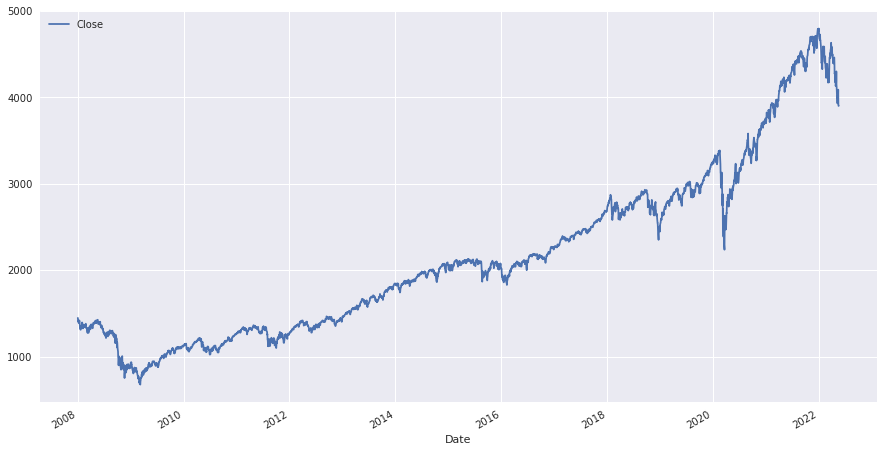

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

sp500_close.plot(figsize=(15, 8))

In [40]:
last_10 = sp500_close.loc['2012-05-22':].copy()
last_10

,Close
Date,
2012-05-22,1316.630005
2012-05-23,1318.859985
2012-05-24,1320.680054
2012-05-25,1317.819946
2012-05-29,1332.420044
...,...
2022-05-16,4008.010010
2022-05-17,4088.850098
2022-05-18,3923.679932


In [45]:
# df.rolling returns Rolling type on which you can chain various aggregate methods
# eg. mean(), median(), min(), max()
last_10.rolling(window=50)

Rolling [window=50,center=False,axis=0,method=single]

In [43]:
last_10.rolling(window=50).mean() # 50day MA

,Close
Date,
2012-05-22,NaN
2012-05-23,NaN
2012-05-24,NaN
2012-05-25,NaN
2012-05-29,NaN
...,...
2022-05-16,4324.611011
2022-05-17,4322.366216
2022-05-18,4317.425811


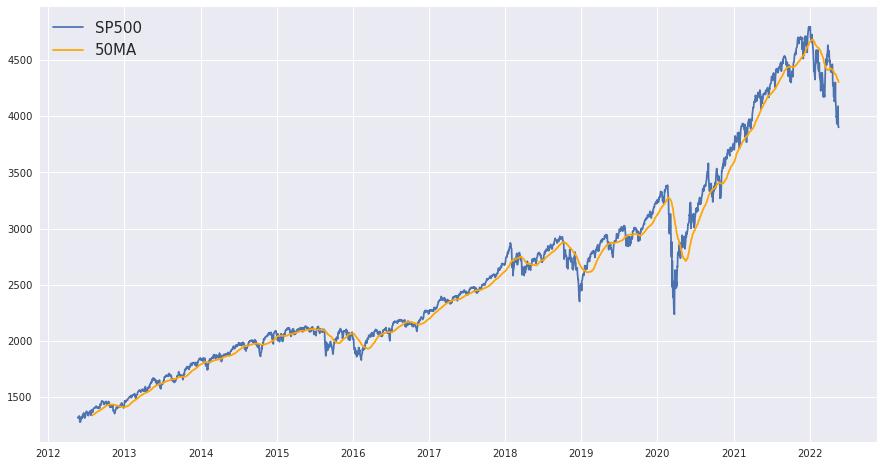

In [53]:
ma50 = last_10.rolling(50).mean()
plt.figure(figsize=(15, 8))
plt.plot(last_10, label="SP500")
plt.plot(ma50, label="50MA", c="orange")
plt.legend(loc="upper left", fontsize=15)
plt.show()


## Momentum trading with SMA and EWMA
We can use two moving averages with long and short time window to determine the current momentum of the price.
Exponentially weighted moving average can react to the latest event quicker.
- Use EMA when you want to see the short-term trend by smoothing out the noise or when you want to detect anomaly in the less-volatile market 
- Use SMA when you want to filter out noise in a volatile market

In [54]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000
2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000
...,...,...,...,...,...,...
2022-05-16,4013.020020,4046.459961,3983.989990,4008.010010,4008.010010,3824320000
2022-05-17,4052.000000,4090.719971,4033.929932,4088.850098,4088.850098,3846580000
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,3923.679932,4428960000


In [55]:
sp500 = sp500.Close.to_frame()
sp500["MA50"] = sp500.rolling(50).mean()
sp500

,Close,MA50
Date,,
2008-01-02,1447.160034,NaN
2008-01-03,1447.160034,NaN
2008-01-04,1411.630005,NaN
2008-01-07,1416.180054,NaN
2008-01-08,1390.189941,NaN
...,...,...
2022-05-16,4008.010010,4324.611011
2022-05-17,4088.850098,4322.366216
2022-05-18,3923.679932,4317.425811


<AxesSubplot:xlabel='Date'>

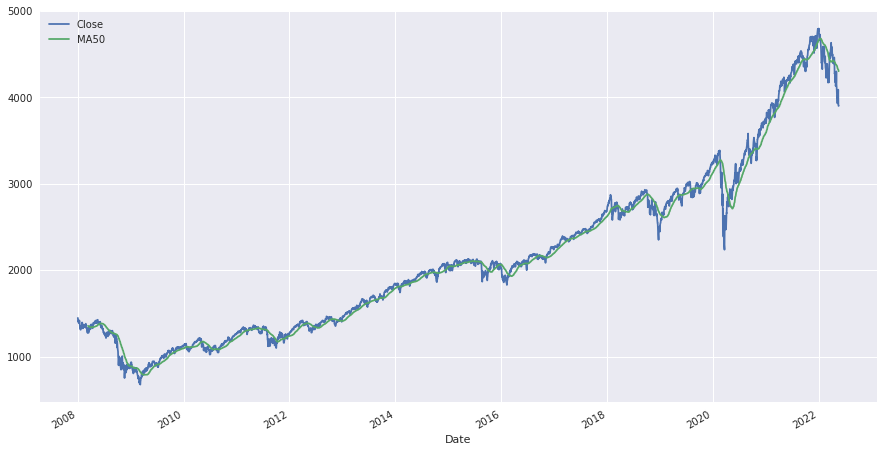

In [57]:
sp500.plot(figsize=(15, 8))

In [58]:
sp500["MA200"] = sp500.Close.rolling(200).mean()
sp500

,Close,MA50,MA200
Date,,,
2008-01-02,1447.160034,NaN,NaN
2008-01-03,1447.160034,NaN,NaN
2008-01-04,1411.630005,NaN,NaN
2008-01-07,1416.180054,NaN,NaN
2008-01-08,1390.189941,NaN,NaN
...,...,...,...
2022-05-16,4008.010010,4324.611011,4476.271393
2022-05-17,4088.850098,4322.366216,4474.779843
2022-05-18,3923.679932,4317.425811,4472.282493


<AxesSubplot:xlabel='Date'>

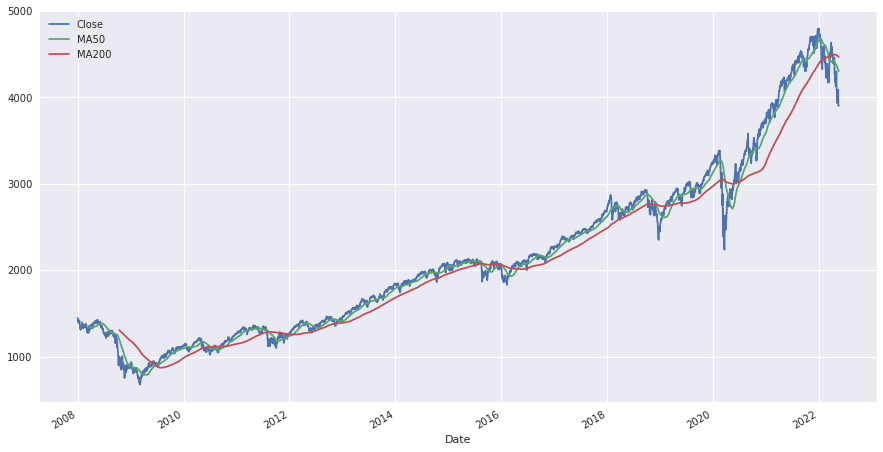

In [60]:
sp500.plot(figsize=(15, 8))

<AxesSubplot:xlabel='Date'>

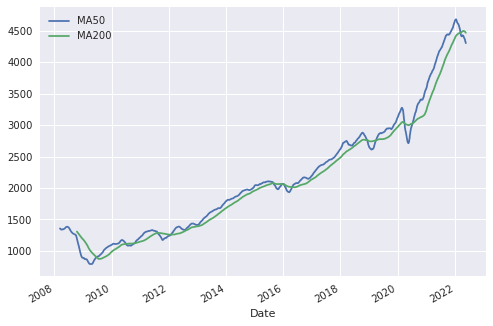

In [64]:
# MA50 above MA200 means that it has the upward momentum -> long
# In contrast, if MA50 falls below MA200, it has the downward momentum -> hold/short
sp500.loc[:,["MA50","MA200"]].plot()

In [70]:
## EWMA (exponentially weighted moving average)
## ewm does NOT set the min_periods using the span by default!
sp500["EWMA50"] = sp500.Close.ewm(span=50, min_periods=50).mean()
sp500

,Close,MA50,MA200,EWMA50
Date,,,,
2008-01-02,1447.160034,NaN,NaN,NaN
2008-01-03,1447.160034,NaN,NaN,NaN
2008-01-04,1411.630005,NaN,NaN,NaN
2008-01-07,1416.180054,NaN,NaN,NaN
2008-01-08,1390.189941,NaN,NaN,NaN
...,...,...,...,...
2022-05-16,4008.010010,4324.611011,4476.271393,4282.021651
2022-05-17,4088.850098,4322.366216,4474.779843,4274.446296
2022-05-18,3923.679932,4317.425811,4472.282493,4260.690752


<AxesSubplot:xlabel='Date'>

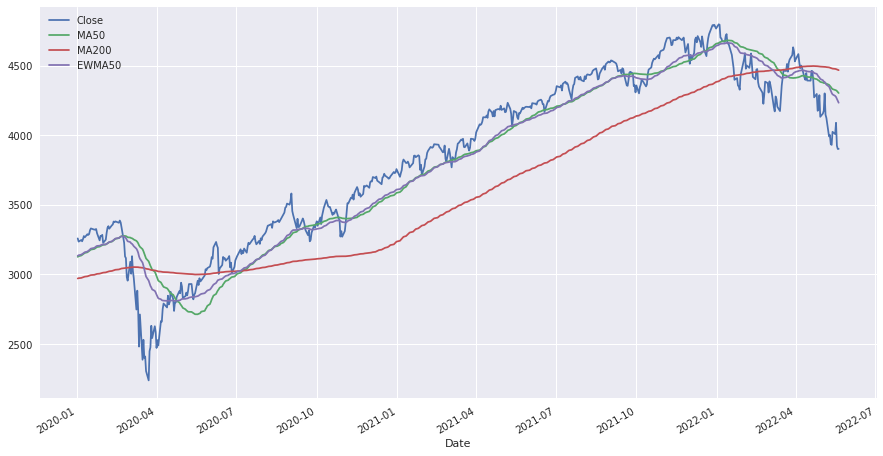

In [75]:
sp500.loc["2020-01-01":].plot(figsize=(15, 8))